In [1]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.operators.sampling.lhs import LatinHypercubeSampling
from pymoo.optimize import minimize as moo_minimize
from pymoo.algorithms.moo.nsga3 import ReferenceDirectionSurvival
from pymoode.nsder import NSDER
from pymoode.gde3 import GDE3
from pymoo.factory import get_reference_directions

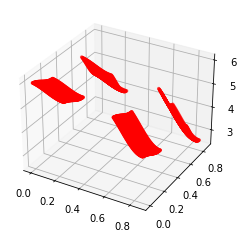

<Axes3DSubplot:>

In [2]:
from pymoo.factory import get_problem
from pymoo.util.plotting import plot

problem = get_problem("dtlz7")
plot(problem.pareto_front(), no_fill=True)

In [3]:
lhs = LatinHypercubeSampling()

In [4]:
NGEN = 300
POPSIZE = 234
SEED = 3

In [5]:
problem.__dict__

{'k': 8,
 'n_var': 10,
 'n_obj': 3,
 'n_constr': 0,
 'data': {'type_var': numpy.float64},
 'xl': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'xu': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'callback': None,
 'check_inconsistencies': True,
 'replace_nan_values_by': inf,
 'exclude_from_serialization': [],
 '_pareto_set': <pymoo.util.cache.Cache at 0x2ebe2c909a0>,
 '_pareto_front': <pymoo.util.cache.Cache at 0x2ebe5d5adc0>,
 '_ideal_point': None,
 '_nadir_point': None}

In [6]:
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=20)

In [7]:
ref_dirs.shape

(231, 3)

In [8]:
gde3 = GDE3(pop_size=POPSIZE, CR=0.2, F=(0.1, 1.0), sampling=lhs, gamma=1e-4, refpoint=1,
            variant="DE/ranked/1/bin", SA=0.5,
            survival=ReferenceDirectionSurvival(ref_dirs))

res_gde3 = moo_minimize(problem,
                        gde3,
                        ('n_gen', NGEN),
                         seed=SEED,
                         save_history=True,
                         verbose=True)

n_gen |  n_eval |     igd      |      gd     
    1 |     234 |  2.250694476 |  2.710524370
    2 |     468 |  2.149414678 |  2.500543858
    3 |     702 |  1.874394496 |  2.624435143
    4 |     936 |  1.592400922 |  2.546513283
    5 |    1170 |  1.581270697 |  2.280283829
    6 |    1404 |  1.267628951 |  1.863381486
    7 |    1638 |  1.089616045 |  1.570527019
    8 |    1872 |  1.089616045 |  1.352012063
    9 |    2106 |  0.959870933 |  1.348787488
   10 |    2340 |  0.826238619 |  1.319598080
   11 |    2574 |  0.572073997 |  1.076448881
   12 |    2808 |  0.550616082 |  0.884883765
   13 |    3042 |  0.443528711 |  0.709818531
   14 |    3276 |  0.421425045 |  0.724418927
   15 |    3510 |  0.364779104 |  0.649646025
   16 |    3744 |  0.326092412 |  0.470545333
   17 |    3978 |  0.277572882 |  0.474008323
   18 |    4212 |  0.226906940 |  0.409163059
   19 |    4446 |  0.201742057 |  0.295724832
   20 |    4680 |  0.191008451 |  0.300601825
   21 |    4914 |  0.165594158 |  

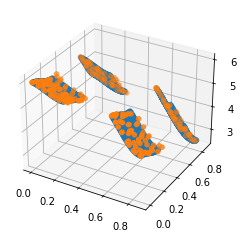

<Axes3DSubplot:>

In [9]:
plot(problem.pareto_front(), res_gde3.F)

In [10]:
nsga3 = NSGA3(pop_size=POPSIZE, sampling=lhs,
              ref_dirs=ref_dirs)

res_nsga3 = moo_minimize(problem,
                         nsga3,
                         ('n_gen', NGEN),
                         seed=SEED,
                         save_history=True,
                         verbose=True)

n_gen |  n_eval |     igd      |      gd     
    1 |     234 |  2.250694476 |  2.698845198
    2 |     468 |  2.250694476 |  2.329116680
    3 |     702 |  2.142830351 |  2.596005122
    4 |     936 |  1.748459137 |  2.082554903
    5 |    1170 |  1.587411875 |  2.147726666
    6 |    1404 |  1.585216009 |  1.912012903
    7 |    1638 |  1.101328319 |  1.396838334
    8 |    1872 |  0.928135215 |  1.242483633
    9 |    2106 |  0.821568586 |  1.145861144
   10 |    2340 |  0.642421185 |  0.888870634
   11 |    2574 |  0.512970496 |  0.718043604
   12 |    2808 |  0.484161980 |  0.650648487
   13 |    3042 |  0.440223447 |  0.543037027
   14 |    3276 |  0.434931259 |  0.482737874
   15 |    3510 |  0.365858413 |  0.394314982
   16 |    3744 |  0.331118057 |  0.322754409
   17 |    3978 |  0.319829771 |  0.423283206
   18 |    4212 |  0.313653614 |  0.267950581
   19 |    4446 |  0.348433857 |  0.209588154
   20 |    4680 |  0.239725727 |  0.215816774
   21 |    4914 |  0.213432551 |  

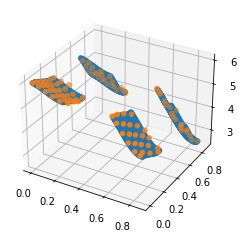

<Axes3DSubplot:>

In [11]:
plot(problem.pareto_front(), res_nsga3.F)

In [14]:
nsder = NSDER(ref_dirs=ref_dirs, pop_size=POPSIZE, CR=0.7, F=(0.1, 1.0), sampling=lhs, gamma=1e-4, refpoint=1.0,
             variant="DE/ranked/1/bin", SA=0.5)
    
res_nsder = moo_minimize(problem,
                         nsder,
                         ('n_gen', NGEN),
                         seed=SEED,
                         save_history=True,
                         verbose=True)

n_gen |  n_eval |     igd      |      gd     
    1 |     234 |  2.250694476 |  2.698845198
    2 |     468 |  1.541165470 |  2.648646198
    3 |     702 |  1.568306687 |  2.419811443
    4 |     936 |  1.392472441 |  2.374425816
    5 |    1170 |  0.891399972 |  1.126363528
    6 |    1404 |  0.723805119 |  1.095312818
    7 |    1638 |  0.694453213 |  1.187843899
    8 |    1872 |  0.572358427 |  0.637089566
    9 |    2106 |  0.551298295 |  0.675642253
   10 |    2340 |  0.431373074 |  0.475588455
   11 |    2574 |  0.372269207 |  0.464177341
   12 |    2808 |  0.290299660 |  0.337208753
   13 |    3042 |  0.246340019 |  0.241113342
   14 |    3276 |  0.216789213 |  0.243701421
   15 |    3510 |  0.173012286 |  0.183263868
   16 |    3744 |  0.146571339 |  0.178948869
   17 |    3978 |  0.138792339 |  0.127250176
   18 |    4212 |  0.119854391 |  0.115782681
   19 |    4446 |  0.109159818 |  0.099559145
   20 |    4680 |  0.103614423 |  0.095622001
   21 |    4914 |  0.087760866 |  

%matplotlib qt

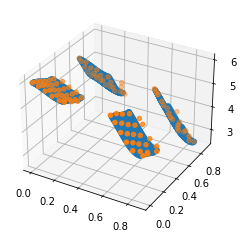

<Axes3DSubplot:>

In [15]:
plot(problem.pareto_front(), res_nsder.F)